# Genshin Impact Weapon Ability Analysis

# Abstract

This project conducts a comprehensive analysis of weapon abilities in the game Genshin Impact, focusing on both statistical evaluation and sentiment analysis. Initially, exploratory data analysis (EDA) was performed to check for missing values, determine the minimum and maximum weapon attack values based on rarity, count the weapon categories, and utilize ydata_profiling for an in-depth overview. Subsequently, the NLTK library was used to form synonymous sets through WordNet, extracting and filtering relevant verbs. Finally, sentiment analysis was conducted using the VADER sentiment analyzer to classify the filtered verbs into positive, negative, and neutral categories based on their polarity. This multi-faceted approach provides valuable insights into the attributes and perceptions of weapon abilities within the game.

# Objective

The objective of this project is to analyze the abilities of Genshin Impact weapons through statistical evaluation and sentiment analysis, leveraging WordNet and the VADER sentiment analyzer to categorize related verbs into positive, negative, and neutral sentiments. This aims to provide a deeper understanding of the characteristics of these weapon abilities.

# Data Description

weapon_name: The name of the weapon.

type: The type or category of the weapon (e.g., Sword, Polearm, Catalyst).

rarity: The rarity of the weapon, typically indicated by stars.

base_atk: The base attack value of the weapon when it is initially obtained.

max_atk: The maximum attack value the weapon can reach after upgrades.

substat_type: The type of substat provided by the weapon (e.g., ATK, Energy Recharge).

base_substat: The base value of the substat when the weapon is initially obtained.

max_substat: The maximum value of the substat after upgrades.

passive_name: The name of the weapon's passive ability.

passive_ability: The effect or ability provided by the weapon's passive skill.

ascension_material_1: The first material required for the weapon's ascension (enhancement).

ascension_material_2: The second material required for the weapon's ascension.

ascension_material_3: The third material required for the weapon's ascension.

ascension_material_4: The fourth material required for the weapon's ascension.

elite_enemy_drop_1: The first type of drop from elite enemies required for the weapon's ascension.

elite_enemy_drop_2: The second type of drop from elite enemies required for the weapon's ascension.

elite_enemy_drop_3: The third type of drop from elite enemies required for the weapon's ascension.

general_enemy_drop_1: The first type of drop from general enemies required for the weapon's ascension.

general_enemy_drop_2: The second type of drop from general enemies required for the weapon's ascension.

general_enemy_drop_3: The third type of drop from general enemies required for the weapon's ascension.

# EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("genshin_weapons_v6.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   weapon_name           182 non-null    object
 1   type                  182 non-null    object
 2   rarity                182 non-null    object
 3   base_atk              182 non-null    int64 
 4   max_atk               182 non-null    int64 
 5   substat_type          172 non-null    object
 6   base_substat          172 non-null    object
 7   max_substat           172 non-null    object
 8   passive_name          172 non-null    object
 9   passive_ability       172 non-null    object
 10  ascension_material_1  182 non-null    object
 11  ascension_material_2  182 non-null    object
 12  ascension_material_3  182 non-null    object
 13  ascension_material_4  172 non-null    object
 14  elite_enemy_drop_1    182 non-null    object
 15  elite_enemy_drop_2    182 non-null    ob

<Axes: >

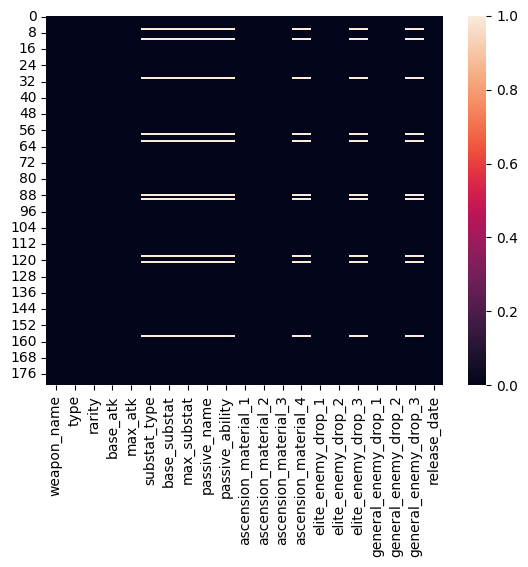

In [ ]:
sns.heatmap(df.isnull())

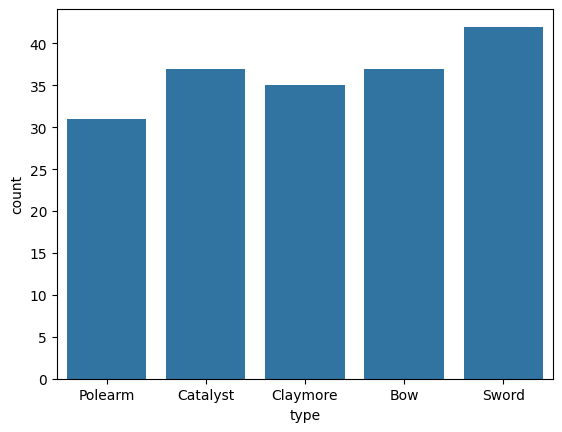

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='type', data = df)

plt.show()


In [ ]:
df[df['rarity']=='1 Star'].describe()

,base_atk,max_atk
count,5.0,5.0
mean,23.0,185.0
std,0.0,0.0
min,23.0,185.0
25%,23.0,185.0
50%,23.0,185.0
75%,23.0,185.0
max,23.0,185.0


In [ ]:
df[df['rarity']=='2 Stars'].describe()

,base_atk,max_atk
count,5.0,5.0
mean,33.0,243.0
std,0.0,0.0
min,33.0,243.0
25%,33.0,243.0
50%,33.0,243.0
75%,33.0,243.0
max,33.0,243.0


In [ ]:
df[df['rarity']=='3 Stars'].describe()

,base_atk,max_atk
count,24.000000,24.000000
mean,39.000000,401.000000
std,0.722315,33.948811
min,38.000000,354.000000
25%,38.750000,389.250000
50%,39.000000,401.000000
75%,39.250000,412.750000
max,40.000000,448.000000


In [ ]:
df[df['rarity']=='4 Stars'].describe()

,base_atk,max_atk
count,103.000000,103.000000
mean,42.533981,520.359223
std,1.235231,42.051522
min,39.000000,440.000000
25%,42.000000,510.000000
50%,42.000000,510.000000
75%,44.000000,565.000000
max,45.000000,620.000000


In [ ]:
df[df['rarity']=='5 Stars'].describe()

,base_atk,max_atk
count,45.000000,45.000000
mean,46.200000,616.866667
std,1.603972,57.477505
min,44.000000,542.000000
25%,46.000000,608.000000
50%,46.000000,608.000000
75%,48.000000,674.000000
max,49.000000,741.000000


In [ ]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=74a3b7dccf5549cbab8b32a791c6d0f96795db241b39146e4aee4a6df4098f8b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import ydata_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# WORDNET

In [ ]:
df.columns

Index(['weapon_name', 'type', 'rarity', 'base_atk', 'max_atk', 'substat_type',
       'base_substat', 'max_substat', 'passive_name', 'passive_ability',
       'ascension_material_1', 'ascension_material_2', 'ascension_material_3',
       'ascension_material_4', 'elite_enemy_drop_1', 'elite_enemy_drop_2',
       'elite_enemy_drop_3', 'general_enemy_drop_1', 'general_enemy_drop_2',
       'general_enemy_drop_3', 'release_date'],
      dtype='object')

In [ ]:
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('punkt')

def extract_synsets(text):
    """
    Extract WordNet synsets from the given text.
    """
    words = nltk.word_tokenize(str(text).lower())
    synsets = []
    for word in words:
        if wordnet.synsets(word):
            synsets.extend(wordnet.synsets(word))
    return synsets

df['synsets'] = df['passive_ability'].apply(extract_synsets)

print(df['synsets'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [Synset('addition.n.03'), Synset('increase.n.0...
1    [Synset('party.n.01'), Synset('party.n.02'), S...
2    [Synset('every.s.01'), Synset('every.s.02'), S...
3    [Synset('while.n.01'), Synset('fictional_chara...
4    [Synset('after.s.01'), Synset('subsequently.r....
Name: synsets, dtype: object


In [ ]:
# df['synsets'].to_csv('wordnet.csv', index=False)

In [ ]:
keyword_freq = {}

for index, row in df.iterrows():
    synsets = row['synsets']

    for synset in synsets:
        for lemma in synset.lemmas():
            keyword = lemma.name()
            if keyword in keyword_freq:
                keyword_freq[keyword] += 1
            else:
                keyword_freq[keyword] = 1

keyword_df = pd.DataFrame(columns=['keyword', 'type', 'frequency'])

for keyword, freq in keyword_freq.items():
    pos = wordnet.synsets(keyword, lang='eng', pos=wordnet.NOUN)[0].pos() if wordnet.synsets(keyword, lang='eng', pos=wordnet.NOUN) else wordnet.synsets(keyword, lang='eng', pos=wordnet.VERB)[0].pos() if wordnet.synsets(keyword, lang='eng', pos=wordnet.VERB) else wordnet.synsets(keyword, lang='eng', pos=wordnet.ADJ)[0].pos() if wordnet.synsets(keyword, lang='eng', pos=wordnet.ADJ) else wordnet.synsets(keyword, lang='eng', pos=wordnet.ADV)[0].pos() if wordnet.synsets(keyword, lang='eng', pos=wordnet.ADV) else None

    keyword_row = {'keyword': keyword, 'type': pos, 'frequency': freq}

    keyword_df = pd.concat([keyword_df, pd.DataFrame(keyword_row, index=[0])], ignore_index=True)

print(keyword_df)

            keyword type frequency
0          addition    n       158
1          increase    n       979
2              gain    n       904
3         increment    n       216
4            growth    n       108
...             ...  ...       ...
3529   combat-ready    s         1
3530  participating    v         1
3531          alive    a         1
3532        dynamic    n         1
3533             xx    n         1

[3534 rows x 3 columns]


In [ ]:
# separation of verb type keywords from the wordnet
print(keyword_df[keyword_df['type']=='v'])

            keyword type frequency
18       break_open    v        33
20            erupt    v        34
21          explode    v        33
22           abound    v        33
54            equip    v        76
...             ...  ...       ...
3493       evaluate    v         1
3494        valuate    v         1
3496       appraise    v         1
3502        corking    v         1
3530  participating    v         1

[949 rows x 3 columns]


In [ ]:
all_passive_ability_text = ' '.join(df['passive_ability'].astype(str).tolist())

def keyword_exists(keyword):
    return keyword in all_passive_ability_text

keyword_df['exists'] = keyword_df['keyword'].apply(keyword_exists)

In [ ]:
print(keyword_df['keyword'][(keyword_df['type']=='v') & (keyword_df['exists']==True)])

54           equip
81         provide
89           allow
108          based
114          exist
           ...    
3078        broken
3204       attract
3459     determine
3472    determined
3478        regain
Name: keyword, Length: 81, dtype: object


In [ ]:
filtered_keywords = keyword_df['keyword'][(keyword_df['type']=='v') & (keyword_df['exists']==True)]
wordnt = pd.DataFrame(filtered_keywords).reset_index(drop=True)
print(wordnt.head())

   keyword
0    equip
1  provide
2    allow
3    based
4    exist


# Sentimental Analysis

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(word):
    scores = analyzer.polarity_scores(word)
    if scores['compound'] >= 0:
        return 'positive'
    else:
        return 'negative'

wordnt['sentiment'] = wordnt['keyword'].apply(classify_sentiment)

print(wordnt)

       keyword sentiment
0        equip  positive
1      provide  positive
2        allow  positive
3        based  positive
4        exist  positive
..         ...       ...
76      broken  negative
77     attract  positive
78   determine  positive
79  determined  positive
80      regain  positive

[81 rows x 2 columns]


In [ ]:
# Number of positive, negative and netural keywords
print('Positive: ',len(wordnt[wordnt['sentiment']=='positive']))
print('Negative: ',len(wordnt[wordnt['sentiment']=='negative']))

Positive:  75
Negative:  6


In [ ]:
positive_words = wordnt[wordnt['sentiment'] == 'positive']['keyword']
negative_words = wordnt[wordnt['sentiment'] == 'negative']['keyword']

positive_rows_indices = []
negative_rows_indices = []

for index, row in df['passive_ability'].items():
    row_text = str(row)
    if any(word in row_text for word in positive_words):
        positive_rows_indices.append(index)
    if any(word in row_text for word in negative_words):
        negative_rows_indices.append(index)

positive_rows = df['passive_ability'][positive_rows_indices]
negative_rows = df['passive_ability'][negative_rows_indices]

# Number of rows which has positive, negative and netural keywords
print('Positive: ',len(positive_rows))
print('Negative: ',len(negative_rows))

Positive:  146
Negative:  22


In [ ]:
# Convert lists to sets for set operations
positive_set = set(positive_rows_indices)
negative_set = set(negative_rows_indices)

# Find intersections
intersection_positive_negative = positive_set & negative_set

In [ ]:
# Calculate lengths of each intersection
print('Positive and Negative:', len(intersection_positive_negative))

Positive and Negative: 15


In [ ]:
print("Count stat:")
print("Positive weapon: ",len(positive_rows))
print("Negative weapon: ",len(negative_rows))
print("Neutral weapon: ",len(intersection_positive_negative))

Count stat:
Positive weapon:  146
Negative weapon:  22
Neutral weapon:  15


# Results

In [ ]:
# positive weapons
df['weapon_name'][positive_rows_indices]

1         A Thousand Floating Dreams
2                          Akuoumaru
3                       Alley Hunter
4                   Amenoma Kageuchi
5                          Amos' Bow
                   ...              
177         The Dockhand's Assistant
178             Crane's Echoing Call
179         Crimson Moon's Semblance
180                   Uraku Misugiri
181    Dialogues of the Desert Sages
Name: weapon_name, Length: 146, dtype: object

In [ ]:
# negative weapons
df['weapon_name'][negative_rows_indices]

5                     Amos' Bow
18      Bloodtainted Greatsword
22                   Cool Steel
28                Dragon's Bane
29            Dragonspine Spear
51                  Frostbearer
66       Katsuragikiri Nagamasa
69           Kitain Cross Spear
70     Light of Foliar Incision
71                  Lion's Roar
76                  Magic Guide
83        Mistsplitter Reforged
100                 Rainslasher
101                   Raven Bow
117    Scion of the Blazing Sun
129                   Slingshot
130      Snow-Tombed Starsilver
138               Talking Stick
140                    The Bell
149            Thundering Pulse
151            Toukabou Shigure
170                     Verdict
Name: weapon_name, dtype: object

In [ ]:
# netural weapons
df['weapon_name'][list(intersection_positive_negative)]

129                   Slingshot
130      Snow-Tombed Starsilver
66       Katsuragikiri Nagamasa
5                     Amos' Bow
69           Kitain Cross Spear
70     Light of Foliar Incision
138               Talking Stick
170                     Verdict
140                    The Bell
51                  Frostbearer
83        Mistsplitter Reforged
149            Thundering Pulse
117    Scion of the Blazing Sun
151            Toukabou Shigure
29            Dragonspine Spear
Name: weapon_name, dtype: object

# Conclusion

This project successfully analyzed Genshin Impact weapon abilities through exploratory data analysis and sentiment analysis. By utilizing WordNet and the VADER sentiment analyzer, we categorized related weapon ability descriptors into positive, negative, and neutral sentiments. The findings provide a detailed understanding of the effects associated with weapon abilities, offering valuable insights for players and developers in enhancing game experience and balancing weapon characteristics.